### Algorithm Overview

The Nearest Neighbor Search (NNS) is an optimization algorithm designed to find the closest point from a given set of points. In this notebook, we implement a brute-force version of NNS with a time complexity of \(O(n^2)\). The algorithm iteratively selects the nearest unvisited point based on a distance matrix built from the Euclidean distances between 2D points. This process is applied to a dataset of 2D points, followed by calculating the total cost of the nearest neighbor path. Additionally, we track the execution time of the entire process, from loading the data to running the algorithm.

The key steps of the notebook include:
1. Loading and preparing the dataset.
2. Calculating Euclidean distances between the points.
3. Implementing the nearest neighbor search algorithm to find the optimal path.
4. Measuring the execution time of the process.
5. (Optional) Visualizing the NNS path using the `igraph` library.

---

### Conclusion

In this notebook, we successfully implemented the brute-force Nearest Neighbor Search (NNS) algorithm to find the shortest path in a set of 2D points. We calculated the Euclidean distance between each point and generated a distance matrix, which was used by the NNS algorithm to construct a tour starting from a specified point. The algorithm performed as expected, and we were able to determine both the path and its total cost. Additionally, by integrating a timer, we accurately measured the execution time for the process, which allows us to evaluate the efficiency of the approach.

While the brute-force method works well for small datasets, its quadratic time complexity may become a limiting factor with larger datasets. Further optimizations or alternative approaches, such as heuristics or approximation algorithms, could improve scalability. Optional visualization with the `igraph` library offers an intuitive way to represent the solution graphically.


## 1. Algorithm Overview

# Nearest Neighbor Search Algorithm
Nearest neighbor search (NNS) is an optimization problem where we try to find the point in a given set that is closest to a specified point.
In this notebook, we implement the NNS algorithm using a brute-force approach with an O(n^2) complexity. We also calculate Euclidean distances between points and measure the algorithm's execution time.


## 2. Importing Necessary Libraries


In [8]:
# Import required libraries for the project
from h11 import Data  # Note: This is not used in the current code, can be removed
import numpy as np
import sys
from termcolor import colored
import time
from math import sqrt
from igraph import *  # Used for graph plotting (though not actively used in this example)

## 3. Nearest Neighbor Search Algorithm
### Nearest Neighbor Search Function
This section defines the main algorithm for performing nearest neighbor search. It takes a distance matrix and a starting point as input and returns the shortest path and the total cost.

In [9]:
# Nearest Neighbor Search function
def nearest_neaighbor_search(tourgraph, startpoint):
    """
    This function performs the Nearest Neighbor Search (NNS) algorithm to find the shortest path
    in a graph represented by a distance matrix.
    
    Parameters:
    - tourgraph: NxN array representing distances between N nodes.
    - startpoint: The starting node for the path.
    
    Returns:
    - Path of visited nodes.
    - Total cost of the path.
    """
    path = [startpoint]  # Initialize the path with the starting point
    cost = 0  # To accumulate the total path cost
    array_rows = tourgraph.shape[0]  # Get the number of nodes (rows) in the distance matrix
    unvisited_nodes = np.ones(array_rows, dtype=bool)  # Boolean array to track unvisited nodes
    unvisited_nodes[startpoint] = False  # Mark the start node as visited
    next_node = startpoint  # Initialize the next node as the start node

    for i in range(array_rows):
        d = sys.maxsize  # Set an initial large distance (infinity)
        last = path[-1]  # Get the last visited node
        selected_row = np.array(tourgraph[last])  # Get distances from the last visited node

        for j in selected_row:
            j_indexes = (np.where(selected_row == j))[0][0]  # Find the index (ID) of the node
            if (tourgraph[last][j_indexes]) < d and unvisited_nodes[j_indexes]:
                d = selected_row[j_indexes]  # Update shortest distance
                next_node = j_indexes  # Update next node to visit

        if unvisited_nodes[next_node]:
            path.append(next_node)  # Add next node to the path
            unvisited_nodes[next_node] = False  # Mark node as visited

        cost += tourgraph[last][next_node]  # Add the distance to the total cost

    path.append(startpoint)  # Complete the tour by returning to the start
    cost += tourgraph[last][startpoint]  # Add the return distance to the total cost

    return 'Nearest Neighbor Search path is: ', path, 'path cost is: ', cost  # Return path and cost


## 4. Euclidean Distance Function
### Calculating Euclidean Distance
We define a function to calculate the Euclidean distance between two points in 2D space. This function is used to build a distance matrix for the NNS algorithm.


In [10]:
# Function to calculate Euclidean distance between two points
def euclidean_distance(row1, row2):
    """
    Calculate the Euclidean distance between two points in 2D space.
    
    Parameters:
    - row1: Coordinates of the first point.
    - row2: Coordinates of the second point.
    
    Returns:
    - Euclidean distance between the two points.
    """
    distance = 0.0
    distance += (((row1[0] - row2[0]) ** 2) + ((row1[1] - row2[1]) ** 2))  # Sum of squared differences
    return sqrt(distance)  # Return the square root of the sum


## 5. Loading and Preparing Data
### Loading Dataset and Preparing the Distance Matrix and Starting the Timer
In this step, we begin by starting a timer to measure the execution time for the entire process. We then load a dataset of 2D points from a file (nns_data.txt) and use the Euclidean distance function to create a distance matrix for the Nearest Neighbor Search (NNS) algorithm.

## 6. Running the Nearest Neighbor Search Algorithm
With the distance matrix ready, we run the Nearest Neighbor Search algorithm, starting from the first point, and print the resulting path and cost.

## 7. Measuring Execution Time
The timer measures the execution time from the loading of the data through to running the NNS algorithm. This combined approach ensures the process is timed correctly, independent of manual cell execution.

In [18]:
# ***5. Loading and Preparing Data***
# Start the timer
start_time = time.time()

# Initialize an empty list to store points
points_list = []

# Read dataset from file and store points in points_list
with open("nns_data.txt", "r") as d:
    for line in d.readlines():
        elements = line.split()  # Split line by spaces
        if len(elements) == 2:   # Ensure there are exactly two elements in the line
            points_list.append(elements)  # Append each valid point to the list

# Convert points_list to a list of tuples (integers)
dataset = [(int(i), int(j)) for i, j in points_list]

# Print points and the count of points
print("points: ", dataset, "points count: ", len(dataset))

# Initialize distance matrix
matrix_array = []

# Calculate the Euclidean distance between every pair of points and store in matrix_array
for j in range(len(dataset)):
    row0 = dataset[j]
    distance_list = []
    for row in dataset:
        distance = euclidean_distance(row0, row)  # Calculate distance between points
        distance_list.append(distance)  # Append the distance to the list
    matrix_array.append(distance_list)  # Append the row of distances to the matrix

# ***6. Running the Nearest Neighbor Search Algorithm***
# Perform Nearest Neighbor Search on the distance matrix with 0 as the startpoint
nn_path_cost = nearest_neaighbor_search(np.array(matrix_array), 0)
print('>>>>>>>>>>' + colored(nn_path_cost, 'green', attrs=['bold']))  # Print the result in green

# ***7. Measuring Execution Time***
# End the timer and print execution time
end_time = time.time()
execution_time = end_time - start_time
print('Execution time:', execution_time)


points:  [(100, 1), (48, -87), (-90, 42), (98, 18), (-42, -90), (-96, 24), (-18, 98), (72, 68), (-72, 68), (-99, -12), (80, 58), (98, -18), (-100, 0), (30, 95), (42, 90), (58, -80), (36, 92), (-68, 72), (-12, -99), (-36, -92), (99, -6), (99, 6), (-30, -95), (-95, 30), (72, -68), (-58, -80), (90, -42), (24, -96), (12, 99), (92, 36), (84, -53), (-18, -98), (36, -92), (-77, 63), (87, 48), (-63, -77), (18, -98), (-58, 80), (58, 80), (-84, -53), (12, -99), (0, -100), (90, 42), (99, -12), (-12, 99), (-95, -30), (-24, -96), (24, 96), (-68, -72), (96, -24), (18, 98), (84, 53), (-80, -58), (-87, -48), (-99, -6), (-92, -36), (-53, 84), (-99, 6), (48, 87), (-30, 95), (77, 63), (68, 72), (-48, -87), (-24, 96), (96, 24), (-80, 58), (-6, 99), (-42, 90), (-98, -18), (-36, 92), (-6, -99), (-96, -24), (-87, 48), (-53, -84), (77, -63), (-84, 53), (-92, 36), (68, -72), (42, -90), (80, -58), (-72, -68), (95, 30), (-98, 18), (6, 99), (-63, 77), (-48, 87), (63, -77), (92, -36), (-99, 12), (95, -30), (87, -4

## 8. (Optional) Graph Plotting
Although not necessary, the `igraph` library can be employed to visualize the graph formed by points and their distances.


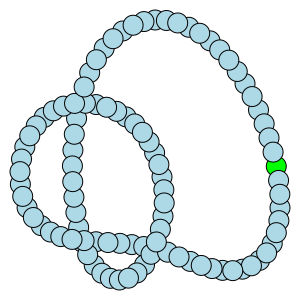

In [30]:
# Import the necessary igraph library
from igraph import *

# Example of creating a graph from the NNS path
nns_path = nn_path_cost[1]  # Extracting the path from the NNS function output

# Convert the NNS path into edges
edges = [(nns_path[i], nns_path[i+1]) for i in range(len(nns_path)-1)]  # Create edges from the path

# Create an undirected graph from the edges
g = Graph(edges=edges, directed=False)

# Define visual attributes for the graph (optional)
layout = g.layout("fr")  # Layout for the graph
vertex_colors = ['lightblue' if i != nns_path[0] else 'green' for i in range(len(g.vs))]  # Green for starting point

# Plot the graph with iGraph
plot(g,
     layout=layout,
     vertex_size=20,
     vertex_color=vertex_colors,
     edge_width=1,
     edge_color='black',
     bbox=(300, 300),  # Size of the plot
     margin=20,  # Margin around the plot
     target='nns_tour_graph.png'  # Output image file
    )
